# Visualizing numerical data

In this workbook we show how to work with the numerical data. 

The diagrams are created based on the tutorials from this website: https://www.python-graph-gallery.com 



In [21]:
# read the file with data using openpyxl
import pandas as pd

# we read the data from the excel file, 
# which is the defect data from the ant 1.3 system
dfDataAnt13 = pd.read_excel('./chapter_6_dataset_numerical.xlsx', 
                            sheet_name='ant_1_3',
                            index_col=0) 

In [ ]:
dfDataAnt13

,CBO,DCC,ExportCoupling,ImportCoupling,NOM,WMC,Defect
ClassName,,,,,,,
org.apache.tools.ant.AntClassLoader,9,2,7,2,13,41,1
org.apache.tools.ant.BuildEvent,6,3,5,3,8,8,0
org.apache.tools.ant.BuildException,80,1,79,1,7,9,0
org.apache.tools.ant.BuildListener,1,1,1,1,7,7,0
org.apache.tools.ant.BuildLogger,1,0,1,0,4,4,0
...,...,...,...,...,...,...,...
org.apache.tools.ant.util.SourceFileScanner,9,2,7,2,2,20,0
org.apache.tools.ant.util.regexp.JakartaOroMatcher,1,0,0,1,4,6,0
org.apache.tools.ant.util.regexp.JakartaRegexpMatcher,1,0,0,1,4,6,0


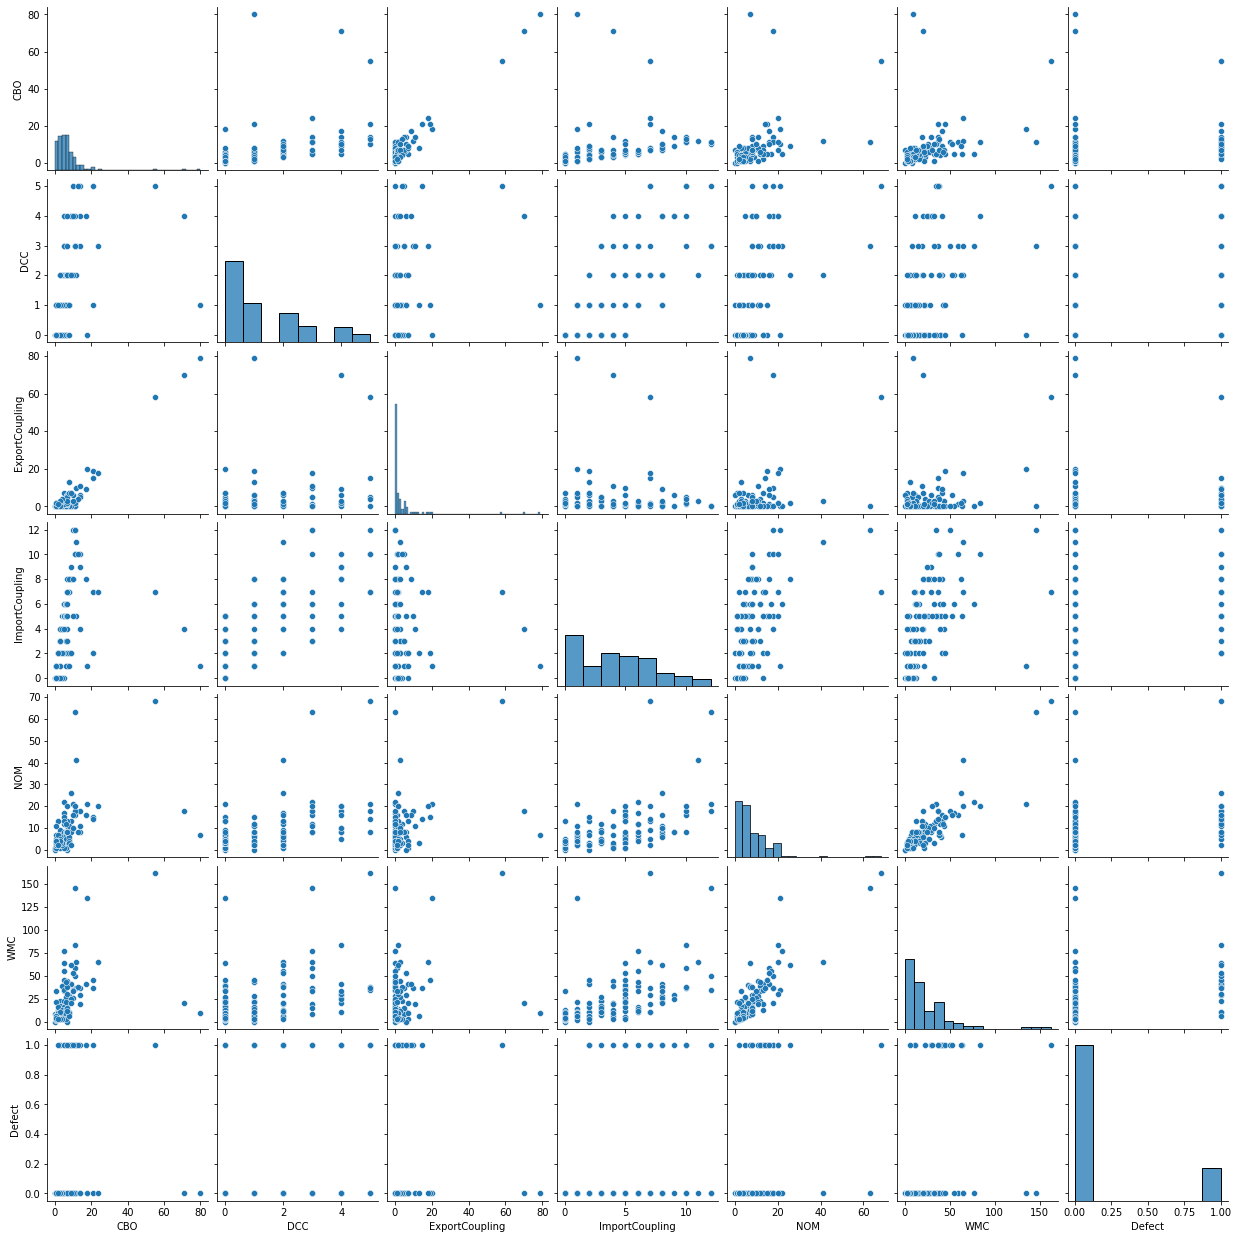

In [ ]:
# now, let's visualize the data using correlograms
# for that, we use the seaborn library
import seaborn as sns
import matplotlib.pyplot as plt

# in seaborn, the correlogram is called 
# pairplot
sns.pairplot(dfDataAnt13)

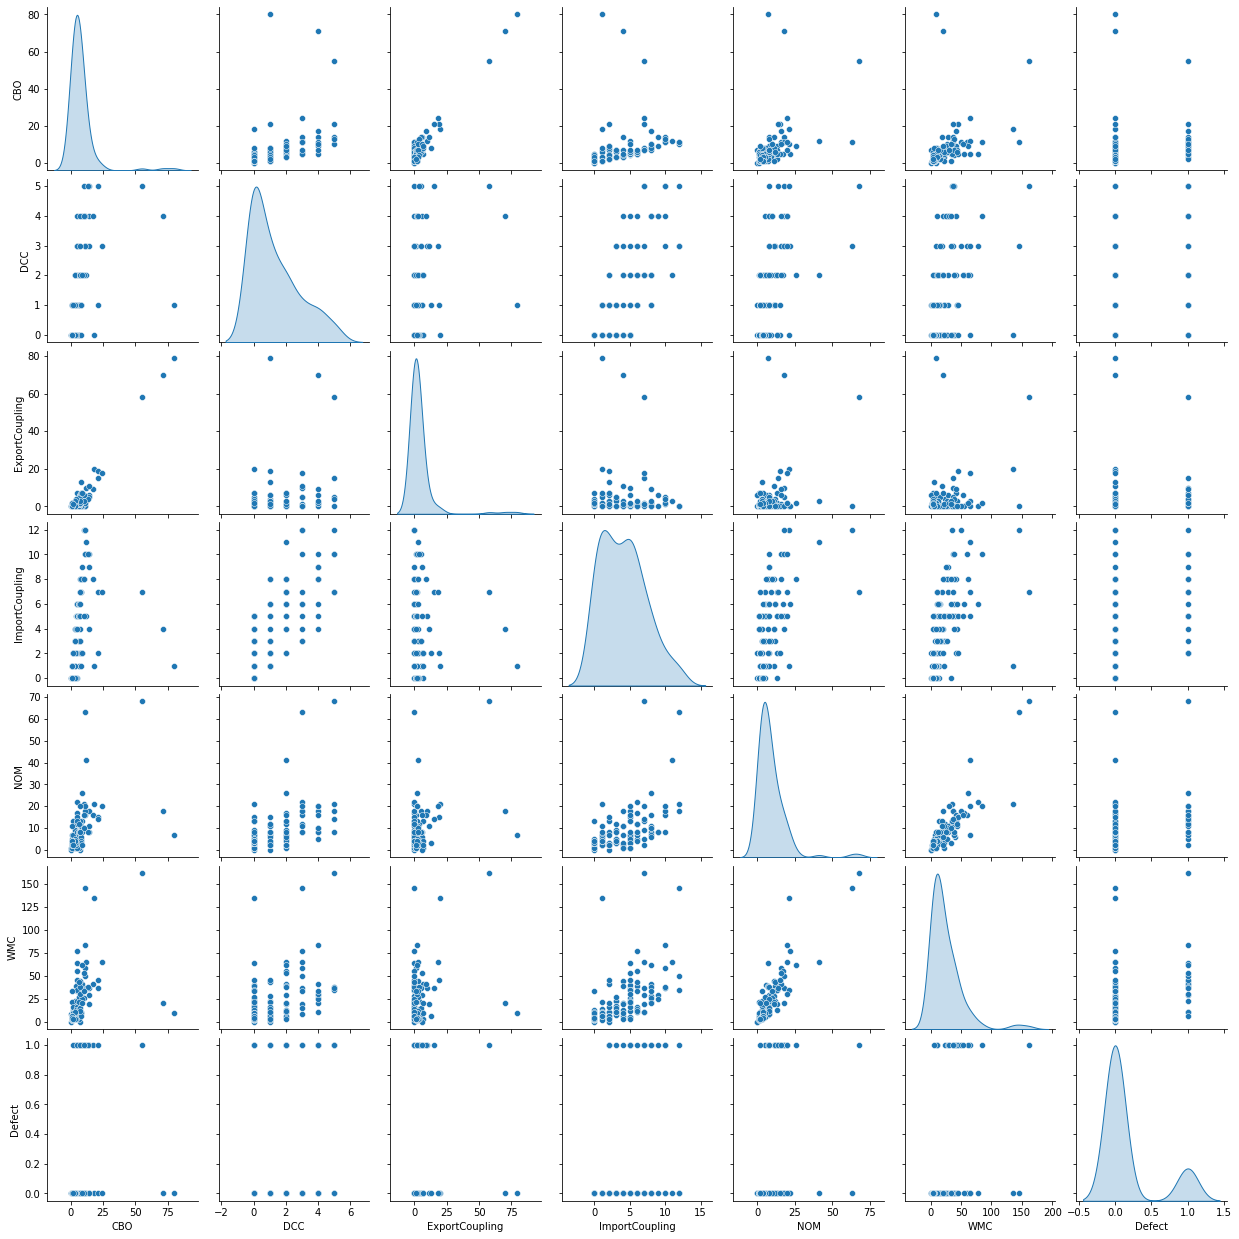

In [ ]:
sns.pairplot(dfDataAnt13, diag_kind="kde")

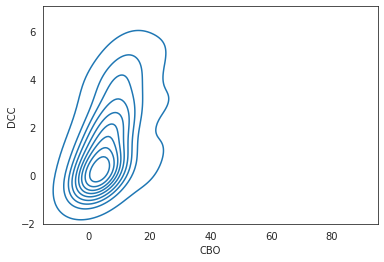

In [ ]:
# now, let's make some density plots
# set seaborn style
sns.set_style("white")

# Basic 2D density plot
sns.kdeplot(x=dfDataAnt13.CBO, y=dfDataAnt13.DCC)
plt.show()


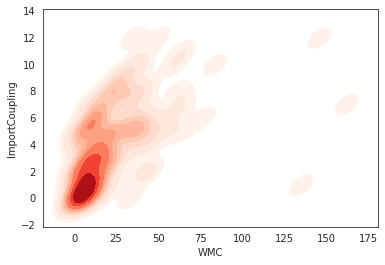

In [ ]:
# Custom the color, add shade and bandwidth
sns.kdeplot(x=dfDataAnt13.WMC, 
            y=dfDataAnt13.ImportCoupling, 
            cmap="Reds", 
            shade=True, 
            bw_adjust=.5)
plt.show()


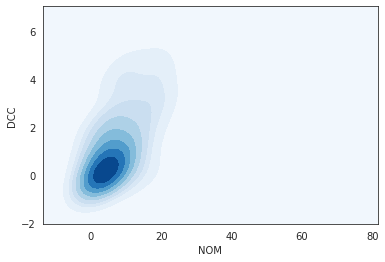

In [ ]:
# Add thresh parameter
sns.kdeplot(x=dfDataAnt13.NOM, 
            y=dfDataAnt13.DCC, 
            cmap="Blues", 
            shade=True, 
            thresh=0)
plt.show()

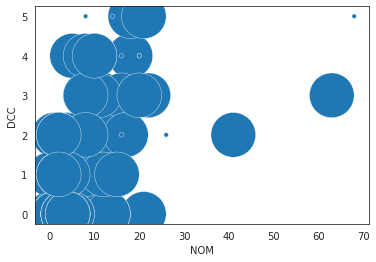

In [ ]:
# now a bubble diagram
# data

# use the scatterplot function to build the bubble map
sns.scatterplot(data=dfDataAnt13, 
                x="NOM", 
                y="DCC", 
                size="Defect", 
                legend=False, 
                sizes=(20, 2000))

# show the graph
plt.show()

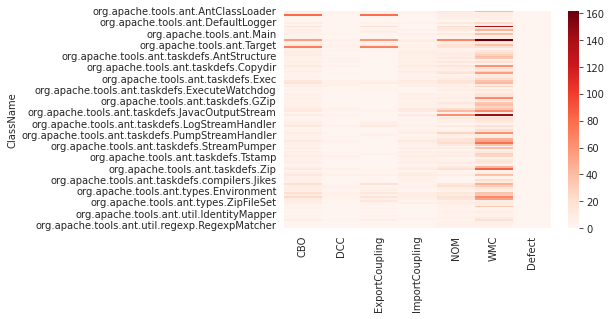

In [ ]:
# heatmap
p1 = sns.heatmap(dfDataAnt13, cmap="Reds")

<AxesSubplot:xlabel='Defect', ylabel='CBO'>

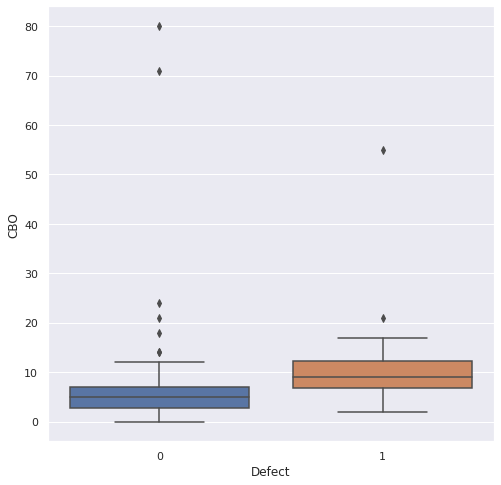

In [ ]:
# boxplot
sns.set(rc={"figure.figsize":(8, 8)})
sns.boxplot( x=dfDataAnt13.Defect, y=dfDataAnt13.CBO )

<AxesSubplot:xlabel='Defect', ylabel='CBO'>

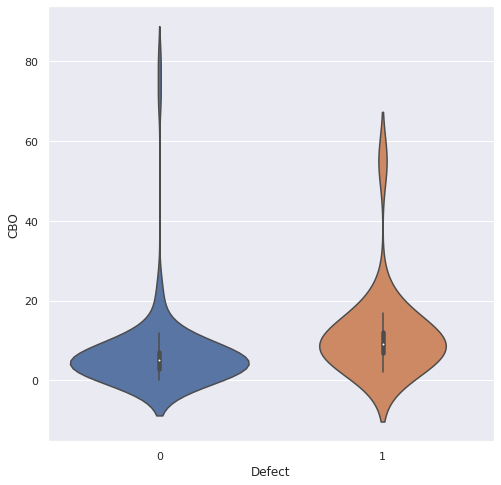

In [ ]:
# violin plot - a variation of a boxplot
# plot violin chart
sns.violinplot( x='Defect', y='CBO', data=dfDataAnt13)

# Enough with the visualizations, let's reduce dimensions

When we work with large datasets, we probably could save time and resources if we reduce the number of datapoints, for example by using PCA - Principal Component Analysis. 

In [22]:
# before we use PCA, we need to remove the variabled "defect"
# as this is the one that will make the PCA use it as one of the 
# main component
dfAnt13NoDefects = dfDataAnt13.drop(['Defect'], axis=1)

In [23]:
# PCA for the data at hand
from sklearn.decomposition import PCA

# we instantiate the PCA class with two parameters
# the first one is the number of principal components
# and the second is the random state
pcaComp = PCA(n_components=2,
              random_state=42)

# then we find the best fit for the principal components
# and fit them to the data
vis_dims = pcaComp.fit_transform(dfAnt13NoDefects)

In [24]:
# to make the labels, let's reset the index of the data
dfAnt13NoDefects.reset_index(inplace=True)
dfAnt13NoDefects.head()

,ClassName,CBO,DCC,ExportCoupling,ImportCoupling,NOM,WMC
0,org.apache.tools.ant.AntClassLoader,9,2,7,2,13,41
1,org.apache.tools.ant.BuildEvent,6,3,5,3,8,8
2,org.apache.tools.ant.BuildException,80,1,79,1,7,9
3,org.apache.tools.ant.BuildListener,1,1,1,1,7,7
4,org.apache.tools.ant.BuildLogger,1,0,1,0,4,4


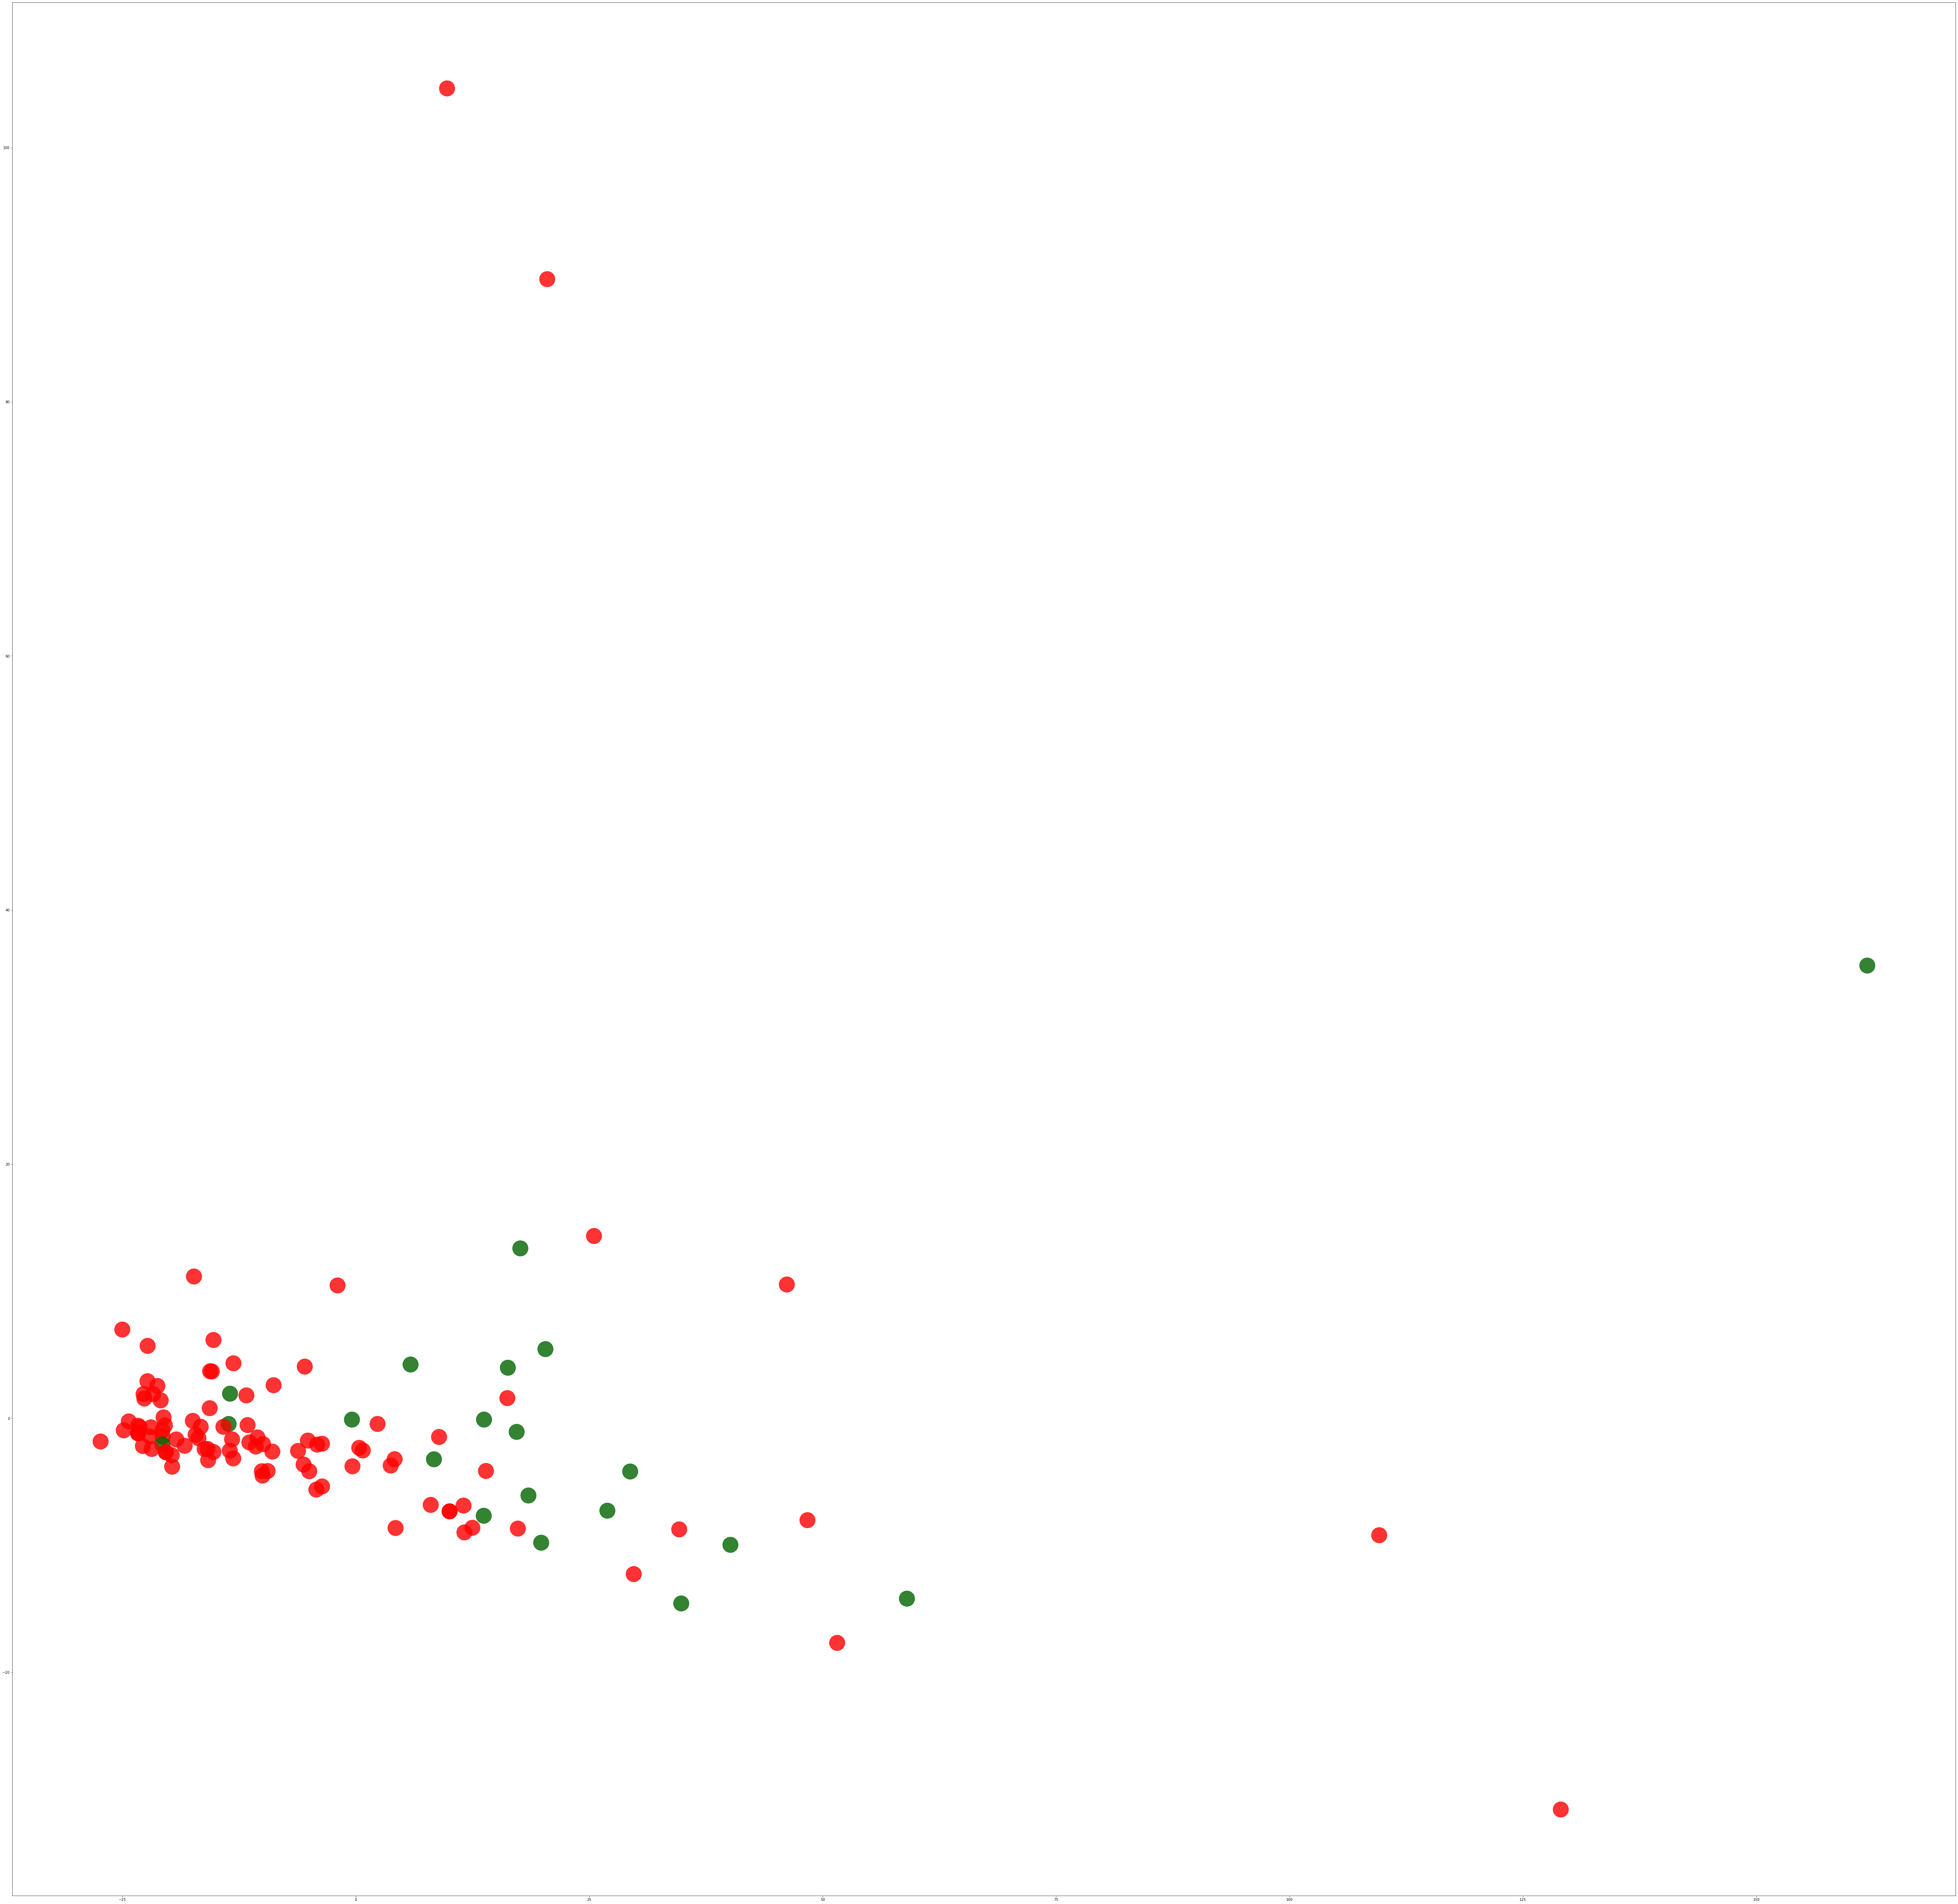

In [31]:
# and of course, we could visualize it
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]

# please note that we use the dataset with defects to 
# assign colors to the data points in the diagram
color_indices = dfDataAnt13.Defect

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, 
            c=color_indices, 
            cmap=colormap, 
            alpha=0.8,
            s=2000)
for score in [0,1]:
    color = colors[score]
# plt.title("PCA visualization of the defect data")
plt.rcParams['figure.figsize'] = (100,100)

# zip joins x and y coordinates in pairs
iIndex = 0
for x,y in vis_dims:

    label = dfAnt13NoDefects.iloc[iIndex].ClassName.split('.')[-1]
    iIndex +=1

    #plt.annotate(label, # this is the text
    #             (x,y), # these are the coordinates to position the label
    #             textcoords="offset points", # how to position the text
    #             xytext=(0,-10), # distance from text to points (x,y)
    #             ha='center',
    #             fontsize = 36) # horizontal alignment can be left, right or center